In [131]:
import numpy as np
import random as rnd
import time as tm
from matplotlib import pyplot as plt
#%matplotlib inline

In [147]:
Z = np.loadtxt( "data" )
#np.random.shuffle(Z)
d = Z.shape[1]-1
n = Z.shape[0]
y = Z[:,0]
X = Z[:,1:]
lim = int(0.8*n)
train_x = Z[:lim,1:]
train_y = Z[:lim,0]
test_x = Z[lim:,1:]
test_y = Z[lim:,0]

In [59]:
# Get a mini-batch stochastic gradient for CSVM
# Choose a random set of B samples per iteration
def getCSVMMBGrad( theta ):
    w = theta[0:-1]
    b = theta[-1]
    n = y.size
    if B <= lim:
        samples = rnd.sample( range(0, lim), B )
        X_ = X[samples,:]
        y_ = y[samples]
    else:
        X_ = X
        y_ = y
    discriminant = np.multiply( (X_.dot( w ) + b), y_ )
    g = np.zeros( (B,) )
    g[discriminant < 1] = -1
    delb =   C * n/B * g.dot( y_ * np.maximum( 1 - np.multiply( (X_.dot( w ) + b), y_ ), 0 ))
    
    #print(np.maximum( 1 - np.multiply( (X_.dot( w ) + b), y_ ), 0 ).shape,w.shape,(X_.T * g).dot( y_ ).shape)
    delw = w + 2.0* C * n/B * (X_.T * g).dot( y_ * np.maximum( 1 - np.multiply( (X_.dot( w ) + b), y_ ), 0 ))  
    #print("Delb = "+str(delb)+" delw = "+str(delw))
    return np.append( delw, delb )

In [149]:
# Quite standard for strongly convex but non-smooth objectives like CSVM
def getStepLength( grad, t ):
    return eta/(t+1)

In [150]:
# Get the CSVM objective value in order to plot convergence curves
def getCSVMObjVal( theta ):
    w = theta[0:-1]
    b = theta[-1]
    hingeLoss = np.maximum( 1 - np.multiply( (X.dot( w ) + b), y ), 0 )
    #print("Hinge loss = "+str(hingeLoss))
    return 0.5 * w.dot( w ) + C * np.dot(hingeLoss,hingeLoss.T)

In [151]:
# Given a gradient oracle, a step length oracle, an initialization,
# perform GD for a specified number of steps (horizon)
# An "oracle" is a fancy name for a function that does a certain job perfectly
def doGD( gradFunc, stepFunc, init, horizon = 10 ):
    objValSeries = np.zeros( (horizon,) )
    timeSeries = np.zeros( (horizon,) )
    totTime = 0
    theta = init
    cumulative = init
    for t in range( horizon ):
        tic = tm.perf_counter()
        delta = gradFunc( theta )
        theta = theta - stepFunc( delta, t+1 ) * delta
        cumulative = cumulative + theta
        toc = tm.perf_counter()
        totTime = totTime + (toc - tic)
        objValSeries[t] = getCSVMObjVal( cumulative/(t+2) )
        timeSeries[t] = totTime
        #print(t)
    return (cumulative/(horizon+1), objValSeries, timeSeries)

In [152]:
#Validation Run
C = 1
eta = 0.001
B = 600
X = train_x
y = train_y
(theta_MB, obj_MB, time_MB) = doGD( getCSVMMBGrad, getStepLength, np.zeros( (d+1,) ), horizon = 10000 )

KeyboardInterrupt: 

In [ ]:
#plt.figure( (7,7) )
#plt.plot( time, obj, color = 'k', linestyle = '--', label = "GD" )
#plt.plot( time_SGD, obj_SGD, color = 'r', linestyle = '-', label = "SGD" )
plt.plot( time_MB, obj_MB, color = 'b', linestyle = ':', label = "MB" )
plt.xlabel( "Elapsed time (sec)" )
plt.ylabel( "C-SVM Objective value" )
plt.legend()
plt.ylim( 0,6000 )
plt.show()

In [50]:
# Validation Error
y = test_y
X = test_x
getCSVMObjVal(theta_MB)
print(obj_MB[-1])

5434.7181416525655


In [153]:
# Final Training
C = 1
eta = 0.001
B = 600
y = Z[:,0]
X = Z[:,1:]
(theta_MB, obj_MB, time_MB) = doGD( getCSVMMBGrad, getStepLength, np.zeros( (d+1,) ), horizon = 5000 )

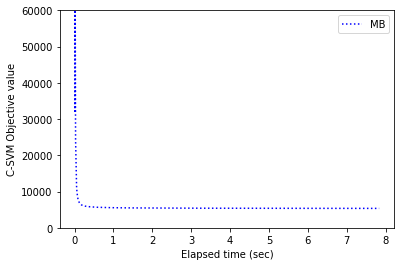

In [154]:
plt.plot( time_MB, obj_MB, color = 'b', linestyle = ':', label = "MB" )
plt.xlabel( "Elapsed time (sec)" )
plt.ylabel( "C-SVM Objective value" )
plt.legend()
plt.ylim( 0,60000 )
plt.show()

In [95]:
obj_MB

array([8859.9164803 , 9349.8988805 , 8200.20012075, ..., 5229.51270364,
       5229.51458587, 5229.51416566])

In [41]:
getCSVMObjVal(np.zeros((d+1,)))

20000.0

In [15]:
Theta_M

NameError: name 'w' is not defined

In [42]:
theta_MB[:-1]

array([-1.03444378,  0.08591134, -0.11622196,  0.39268357,  0.44448062,
        0.13441418, -3.73283956,  0.33902851,  0.06995434,  1.14609033,
       -1.32839078, -0.29818189,  0.37730095,  0.37079055, -0.15259942,
        0.85149505,  0.29513416,  0.3103514 ,  0.11278227, -0.30217433])

In [43]:
theta_MB[-1]

-0.8528213781248161

In [96]:
delta = getCSVMMBGrad(theta_MB)

In [102]:
delta*getStepLength(1,5000)

array([ 1.01699642,  0.32      ,  0.00279727,  0.27333333, -0.00526948,
        0.28666667,  0.09434573,  0.36      ,  0.3       , -0.02265099,
        0.09528195,  0.31333333,  0.4       , -0.02643879, -0.28176135,
       -0.02345637,  0.34      ,  0.00519835,  0.32666667,  0.01209241,
        1.61333333])

In [98]:
delta = getCSVMMBGrad(np.zeros((d+1,)))

In [99]:
delta

array([10169.9642    ,  3200.        ,    27.97266667,  2733.33333333,
         -52.6948    ,  2866.66666667,   943.45733333,  3600.        ,
        3000.        ,  -226.50993333,   952.81946667,  3133.33333333,
        4000.        ,  -264.38793333, -2817.61353333,  -234.56373333,
        3400.        ,    51.98353333,  3266.66666667,   120.92413333,
       16133.33333333])

In [104]:
theta_ca = np.array([-0.9166058,   0.31267801, -0.06718886,  0.5553839,   0.84017354,  0.40650135,
 -4.41067529,  0.52881677,  0.31438468,  1.73524963, -0.8820009,  -0.13137903,
  0.51544475,  0.65706268, -0.39458486,  1.26635405,  0.62332581,  0.21016793,
  0.18228332, -0.43219925,-1.3671724701528323])

In [105]:
getCSVMObjVal(theta_ca)

5906.033231416934

In [106]:
theta_sdcm = np.array([-0.8446657 ,  0.22054605, -0.06297124,  0.53274281,  0.65550638,
        0.21306386, -3.43806178,  0.47401096,  0.20474156,  1.2933272 ,
       -1.24060256, -0.09931551,  0.47545651,  0.29929617, -0.15468443,
        1.08613053,  0.3753558 ,  0.15995374,  0.18520181, -0.4046673 ,
       -1.05969057])

In [107]:
getCSVMObjVal(theta_sdcm)

5296.253942745457

In [108]:
import pickle

In [113]:
file = open("data.dat","rb")

In [114]:
b = pickle.load(file,encoding='bytes')

In [119]:
time_ac = b[0]

In [161]:
obj_ac = b[1]
obj_ac[-1]

5837.565624957553

In [122]:
time_sdcm = np.load("sdcm_time") 

In [123]:
time_sdcm

array([ 0.06565339,  0.06568926,  0.06572551, ..., 18.64310674,
       18.6431883 , 18.64324871])

In [124]:
obj_sdcm = np.load("obj_sdcm")

In [125]:
obj_sdcm

array([10632.29715298,  8389.75884964,  7743.20469779, ...,
        5427.95047554,  5315.63113218,  5296.81541519])

In [170]:
plt.figure(figsize = (14,10),dpi =1000)
plt.plot( time_MB, obj_MB, color = 'r', linestyle = '-', label = "MBGD")
plt.plot( time_sdcm, obj_sdcm, color = 'b', linestyle = '-', label = "SDCM")
plt.plot( time_ac, obj_ac, color = 'g', linestyle = '-', label = "SDCA" )
plt.xlabel( "Elapsed time (sec)" )
plt.ylabel( "Primal Objective (P1) value" )
plt.legend()
plt.ylim( 0,60000 )
plt.show()
#plt.savefig("Plot.pdf",dpi = 1000)

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

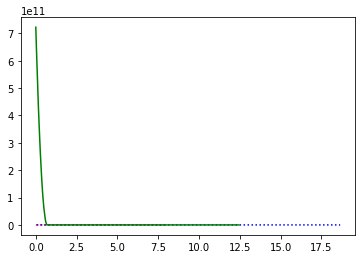

In [134]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot( time_MB, obj_MB, color = 'r', linestyle = ':', label = "MBGD" )
ax.plot( time_sdcm, obj_sdcm, color = 'b', linestyle = ':', label = "SDCM" )
ax.plot( time_ac, obj_ac, color = 'g', linestyle = '-', label = "SDCA" )
ax.xlabel( "Elapsed time (sec)" )
ax.ylabel( "C-SVM Objective value" )
ax.legend()
ax.ylim( 0,60000 )
plt.show()